# Students Performance Analysis
## by Jessika Nunes Caetano

## Investigation Overview

> The goal of this investigation is to identify the main factors that influence in students performance. Here, we will look deeper into variables such as lunch specifications, race/ethnicity, gender, among others.

## Dataset Overview

> Our dataset was obtained from Kaggle and contains 1,000 records of students data, including the variables cited above, parent level of education, whether or not the student completed the preparation course to the tests and math, writing and reading scores for each student. We also added a new column, the mean score, which has the mean of the three subjects (math, writing and reading) scores.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('StudentsPerformance.csv')

mean_score = []

#I will iterate through the dataframe creating the array with the mean score
for row in df.iterrows():
    mean_score.append((row[1]['math score'] + row[1]['writing score'] + row[1]['reading score'])/3)

#I will add the mean score array to the dataframe
df['mean score'] = mean_score

## Let's know a little more about our students


### First, let's see about gender. Are most of the students male or female? ###
>Most of the students are female, but there is a similar number of students of each gender in our dataset.

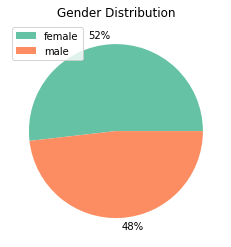

In [8]:
aux1 = df['gender'].value_counts();
plt.pie(aux1, labels = ["{:.0%}".format(i) for i in aux1/sum(aux1)], colors = [sb.color_palette('Set2')[0], sb.color_palette('Set2')[1]]);
plt.title('Gender Distribution');
plt.legend(aux1.index, loc = 'upper left');

### Which gender is having a better performance? ###
>Female students have a higher median of mean scores. 

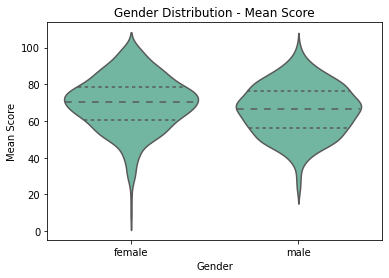

In [9]:
sb.violinplot(data=df, x='gender', y='mean score', color=sb.color_palette('Set2')[0], inner='quartile');
plt.title('Gender Distribution - Mean Score');
plt.xlabel('Gender');
plt.ylabel('Mean Score');

### Does the performance varies by gender when looking at math, writing an reading skills separately? ###
>Female students have higher grades in writing and reading scores, but male students have better scores in math. This may have to do with the hypothesis that students with good reading skills also have good writing skills.

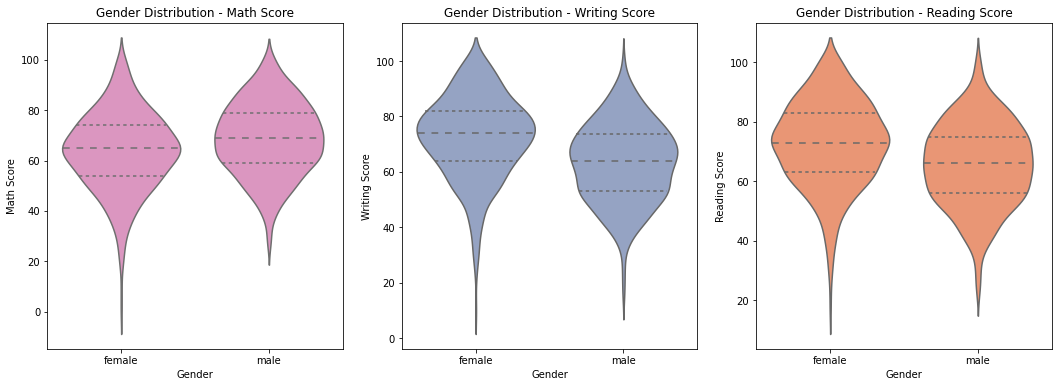

In [10]:
plt.figure(figsize = [18, 6])

plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='gender', y='math score', color=sb.color_palette('Set2')[3], inner='quartile');
plt.title('Gender Distribution - Math Score');
plt.xlabel('Gender');
plt.ylabel('Math Score');

plt.subplot(1, 3, 2)
sb.violinplot(data=df, x='gender', y='writing score', color=sb.color_palette('Set2')[2], inner='quartile');
plt.title('Gender Distribution - Writing Score');
plt.xlabel('Gender');
plt.ylabel('Writing Score');

plt.subplot(1, 3, 3)
sb.violinplot(data=df, x='gender', y='reading score', color=sb.color_palette('Set2')[1], inner='quartile');
plt.title('Gender Distribution - Reading Score');
plt.xlabel('Gender');
plt.ylabel('Reading Score');

### Now, let's see about race/ethnicity groups. Which race/ethnicity group the students belong to? ###
>The biggest group of students is Group C, followed by Group D and Group B.

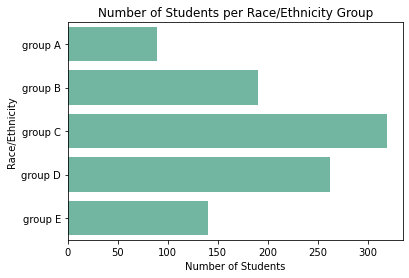

In [11]:
order1 = ['group A', 'group B','group C','group D','group E'];
sb.countplot(data=df, y='race/ethnicity', color = sb.color_palette('Set2')[0], order = order1);
plt.title('Number of Students per Race/Ethnicity Group');
plt.xlabel('Number of Students');
plt.ylabel('Race/Ethnicity');

### Do average mean score vary by ethnicity group? ###
>Using the groupby function we can see that group A really has the lowest performance in mean score an that group E has the best, enforcing our hypothesis of disavantaged and privileged groups. We can also see that group D has better performance than group C, which has better performance than group B. 

In [12]:
df[['race/ethnicity','mean score']].groupby('race/ethnicity').mean()

,mean score
race/ethnicity,
group A,62.992509
group B,65.468421
group C,67.131661
group D,69.179389
group E,72.752381


### Ethnicity group shoul not influence on students performance. Why did that happen? ###
> The Group A, which has the lower average mean score, has a higher percentage of students that eat free or reduced lunch, which could indicate that this group is somehow disavantaged by society. We could say the opposite about group E. The other groups seem to share the same place in society.

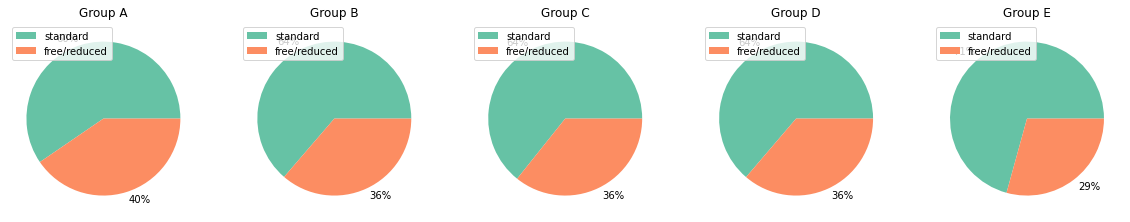

In [13]:
plt.figure(figsize = [20, 6])

plt.subplot(1, 5, 1)
aux = df['lunch'][df['race/ethnicity'] == 'group A'].value_counts()
plt.pie(aux, labels = ["{:.0%}".format(i) for i in aux/sum(aux)], colors = [sb.color_palette('Set2')[0], sb.color_palette('Set2')[1]])
plt.title('Group A')
plt.legend(aux.index, loc = 'upper left')

plt.subplot(1, 5, 2)
aux = df['lunch'][df['race/ethnicity'] == 'group B'].value_counts()
plt.pie(aux, labels = ["{:.0%}".format(i) for i in aux/sum(aux)], colors = [sb.color_palette('Set2')[0], sb.color_palette('Set2')[1]])
plt.title('Group B')
plt.legend(aux.index, loc = 'upper left')

plt.subplot(1, 5, 3)
aux = df['lunch'][df['race/ethnicity'] == 'group C'].value_counts()
plt.pie(aux, labels = ["{:.0%}".format(i) for i in aux/sum(aux)], colors = [sb.color_palette('Set2')[0], sb.color_palette('Set2')[1]])
plt.title('Group C')
plt.legend(aux.index, loc = 'upper left')

plt.subplot(1, 5, 4)
aux = df['lunch'][df['race/ethnicity'] == 'group D'].value_counts()
plt.pie(aux, labels = ["{:.0%}".format(i) for i in aux/sum(aux)], colors = [sb.color_palette('Set2')[0], sb.color_palette('Set2')[1]])
plt.title('Group D')
plt.legend(aux.index, loc = 'upper left')

plt.subplot(1, 5, 5)
aux = df['lunch'][df['race/ethnicity'] == 'group E'].value_counts()
plt.pie(aux, labels = ["{:.0%}".format(i) for i in aux/sum(aux)], colors = [sb.color_palette('Set2')[0], sb.color_palette('Set2')[1]])
plt.title('Group E')
plt.legend(aux.index, loc = 'upper left')

### Speaking of lunch, how are our students eating? ###
>Most of the students have regular lunch (645 of them), but there is a considerable amount of students (355 of them) who have free or reduced lunch.

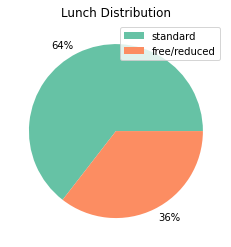

In [14]:
aux1 = df['lunch'].value_counts();
plt.pie(aux1, labels = ["{:.0%}".format(i) for i in aux1/sum(aux1)], colors = [sb.color_palette('Set2')[0], sb.color_palette('Set2')[1]]);
plt.title('Lunch Distribution');
plt.legend(aux1.index, loc = 'upper right');

### How does that impact on their performance? ###
>We can clearly see that students that have a free (probably of lower quality than a paid for) or reduced lunch have lower mean scores. That probably happens because those students who eat better also feel physically better and have more physical and mental health in the moments they are studying.

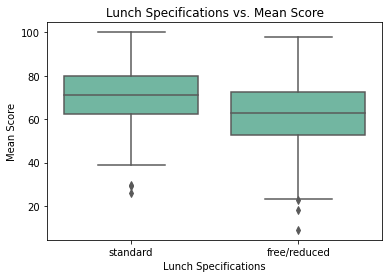

In [15]:
sb.boxplot(data=df, x='lunch', y='mean score', color=sb.color_palette('Set2')[0])
plt.title('Lunch Specifications vs. Mean Score');
plt.xlabel('Lunch Specifications');
plt.ylabel('Mean Score');

### Does lunch specifications impact diferently in male or female students performance? ###
>With this chart we can see that females with standart lunch have a 10 points higher score than with free/reduced lunch, while to male students the difference is only 7.3 higher. The color variation from free/reduced to standart lunch is stronger to females than to males.

In [16]:
means = df.groupby(['lunch', 'gender']).mean()['mean score']
means = means.reset_index(name = 'mean score')
means = means.pivot(index = 'lunch', columns = 'gender', values = 'mean score')

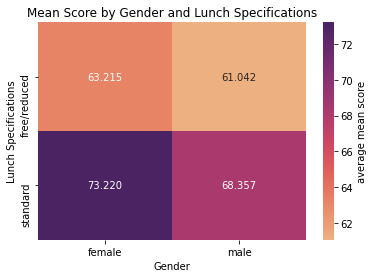

In [17]:
sb.heatmap(means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'average mean score'}, cmap = 'flare')
plt.title('Mean Score by Gender and Lunch Specifications');
plt.xlabel('Gender');
plt.ylabel('Lunch Specifications');

### Do parental education level influence on students performance? ###
>Except for the students with parents that only attended to high school, the higher the parental level of education, the higher the students performance, measured by the mean score. The students with parents eith higher lever of education probably have a better financial condiction, home structure and/or inspiration to pursue higher education. In case of students whose parents did not complete high school, we could suppose that a considerable quantity of them could want to have a different reality for themselves.

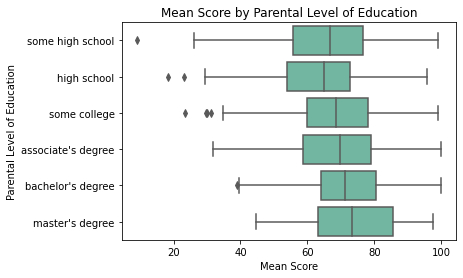

In [18]:
sb.boxplot(data=df, y='parental level of education', x='mean score', color=sb.color_palette('Set2')[0], order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]);
plt.title('Mean Score by Parental Level of Education');
plt.xlabel('Mean Score');
plt.ylabel('Parental Level of Education');

### Was the Test Preparation Course effective for the students who completed it? ###
>Students that have completed the test preparation course have a better performance than others. The course can be considered to be effective.

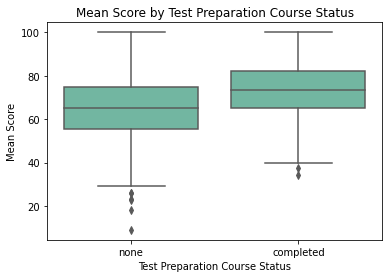

In [19]:
sb.boxplot(data=df, x='test preparation course', y='mean score', color=sb.color_palette('Set2')[0]);
plt.title('Mean Score by Test Preparation Course Status');
plt.ylabel('Mean Score');
plt.xlabel('Test Preparation Course Status');

### What is the relation between the three scores of our students? ###
> - Relation between reading and writing scores appear to be linear, positive and strong;
> - Students with the lowest scores in reading and writing appear to have also low grade in math, and the same happens to students with the highest grades. But in the middle of the grade interval this pattern does not seem to be always mantained.

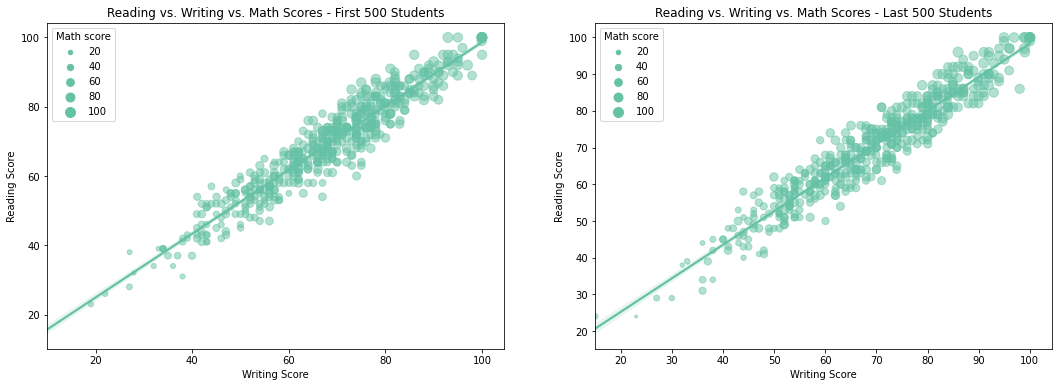

In [20]:
plt.figure(figsize = [18, 6])

sizes = [20, 40, 60, 80, 100]
base_color = sb.color_palette('Set2')[0]
legend_obj = []
for i in sizes:
    legend_obj.append(plt.scatter([], [], s = i, color = base_color))

plt.subplot(1, 2, 1)
sb.regplot(data = df.head(500), x = 'writing score', y = 'reading score', x_jitter = 0.05, color = sb.color_palette('Set2')[0], scatter_kws = {'s' : df['math score'].head(500), 'alpha': 0.5})
plt.legend(legend_obj, sizes, title="Math score")
plt.title('Reading vs. Writing vs. Math Scores - First 500 Students');
plt.ylabel('Reading Score');
plt.xlabel('Writing Score');

plt.subplot(1, 2, 2)
sb.regplot(data = df.tail(500), x = 'writing score', y = 'reading score', x_jitter = 0.05, color = sb.color_palette('Set2')[0], scatter_kws = {'s' : df['math score'].tail(500), 'alpha': 0.5})
plt.legend(legend_obj, sizes, title="Math score")
plt.title('Reading vs. Writing vs. Math Scores - Last 500 Students');
plt.ylabel('Reading Score');
plt.xlabel('Writing Score');

### Does that relation varies between gender groups? ###
>- We can see that female students have a higher quantity of grades concentraded in higher intervales of writing and reading scores. Their math grade seems to increse with the writing and reading grades, but their math grades seem to be lower than to male students.
>- Male students do not have a performance as goos as females in terms of writing and reading scores, but their math scores appear to be much better than the female math scores. Also, the relation between math score and the other two scores in the case of male students, although is evident, do not appear to be as strong as to female students.

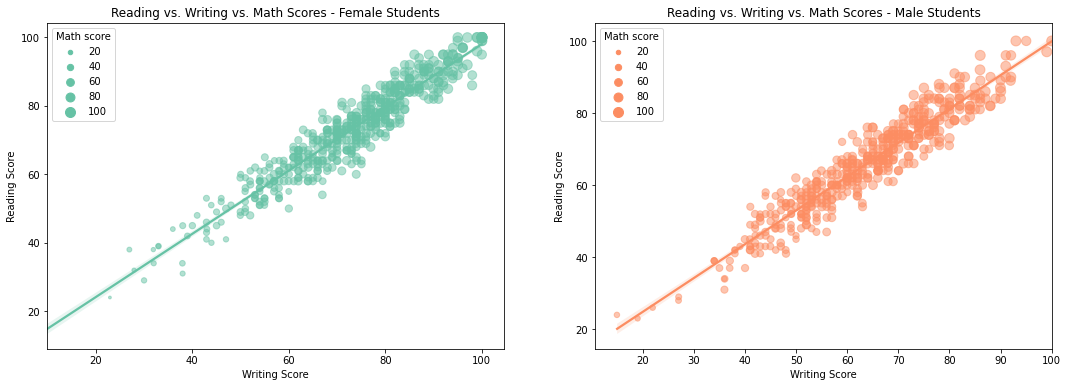

In [21]:
plt.figure(figsize = [18, 6])

sizes = [20, 40, 60, 80, 100]
base_color = sb.color_palette('Set2')[0]
legend_obj = []
for i in sizes:
    legend_obj.append(plt.scatter([], [], s = i, color = base_color))

plt.subplot(1, 2, 1)
sb.regplot(data = df[df['gender'] == 'female'], x = 'writing score', y = 'reading score', x_jitter = 0.05, color = sb.color_palette('Set2')[0], scatter_kws = {'s' : df[df['gender'] == 'female']['math score'], 'alpha': 0.5})
plt.legend(legend_obj, sizes, title="Math score")
plt.title('Reading vs. Writing vs. Math Scores - Female Students');
plt.ylabel('Reading Score');
plt.xlabel('Writing Score');

base_color = sb.color_palette('Set2')[1]
legend_obj = []
for i in sizes:
    legend_obj.append(plt.scatter([], [], s = i, color = base_color))
plt.subplot(1, 2, 2)
sb.regplot(data = df[df['gender'] == 'male'], x = 'writing score', y = 'reading score', x_jitter = 0.05, color = sb.color_palette('Set2')[1], scatter_kws = {'s' : df[df['gender'] == 'male']['math score'], 'alpha': 0.5})
plt.legend(legend_obj, sizes, title="Math score")
plt.title('Reading vs. Writing vs. Math Scores - Male Students');
plt.ylabel('Reading Score');
plt.xlabel('Writing Score');

## Thank you! ##

In [ ]:
!jupyter nbconvert Communicate_Data_Findings_Explanatory_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt